#### Analysis of a single stock - for simulation over the course of a year

Goal: This script simulates a year of weekly pred/close determinations and simulates for any given stock if it is better to invest a consistent price or buy in higher/lower depending on the current performance of the stock.

Take 1 stock and run a trendline through multiple 1 year cycles, creating a linear prediction to be applied weekly. Assess the theoretical performance of adjusting weekly contributions as compared to contributing a consistent amount every week


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Arguments     Scenarios                                                                             Example value

# period        date period to download                                     1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
# interval      data interval. If it’s intraday data, the interval needs to be set within 60 days 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# start         If period is not set- Download start date string (YYYY-MM-DD) or datetime             2020-03-18
# end           If period is not set - Download end date string (YYYY-MM-DD) or datetime              2020-03-19
# prepost       Boolean value to include Pre and Post market data                                     Default is False
# auto_adjust   Boolean value to adjust all OHLC                                                      Default is True
# actions       Boolean value download stock dividends and stock splits events                        Default is True

In [3]:
# pull data
# note: you can't choose a stock with less than 2 years of history

# AAPL, AMD, AMZN, CRM, GOOG, INTC, MDB, MSFT, NVDA, QQQ, SBUX, SQ, TSLA, TSM

stock = yf.Ticker("amd")

df = stock.history(period="2y")
#df = stock.history(period="7d", interval = "1m")
df = pd.DataFrame(df['Close'])
df = df.dropna() #in case the first row generates as nulls
df

,Close
Date,
2019-09-04,30.950001
2019-09-05,31.500000
2019-09-06,30.559999
2019-09-09,30.500000
2019-09-10,30.230000
...,...
2021-08-30,111.320000
2021-08-31,110.720001
2021-09-01,109.989998


In [4]:
# add index to df

#df = pd.DataFrame(df['Close'])
add_index = np.arange(1,len(df)+1)

df['Index'] = add_index

df

,Close,Index
Date,,
2019-09-04,30.950001,1
2019-09-05,31.500000,2
2019-09-06,30.559999,3
2019-09-09,30.500000,4
2019-09-10,30.230000,5
...,...,...
2021-08-30,111.320000,502
2021-08-31,110.720001,503
2021-09-01,109.989998,504


In [5]:
# create 50 dataframes in a dictionary, each 260 days: dataframes['data0'] - dataframes['data49']
# 0 is the most recent 260 days, 49 is the oldest
# 260 days isn't exactly 1 trading year, but I think it's close enough

dataframes = {}
x = (max(df['Index']))-260
y = max(df['Index'])

for i in range(50):
    dataframes['data' + str(i)] = df.iloc[x:y]
    x -= 5
    y -= 5

# show the newest and oldest dataframes
print(dataframes['data0'])
print(dataframes['data49'])

                 Close  Index
Date                         
2020-08-25   86.349998    247
2020-08-26   86.019997    248
2020-08-27   83.800003    249
2020-08-28   85.550003    250
2020-08-31   90.820000    251
...                ...    ...
2021-08-30  111.320000    502
2021-08-31  110.720001    503
2021-09-01  109.989998    504
2021-09-02  109.199997    505
2021-09-03  109.919998    506

[260 rows x 2 columns]
                Close  Index
Date                        
2019-09-05  31.500000      2
2019-09-06  30.559999      3
2019-09-09  30.500000      4
2019-09-10  30.230000      5
2019-09-11  29.760000      6
...               ...    ...
2020-09-09  81.910004    257
2020-09-10  78.980003    258
2020-09-11  76.339996    259
2020-09-14  77.900002    260
2020-09-15  78.930000    261

[260 rows x 2 columns]


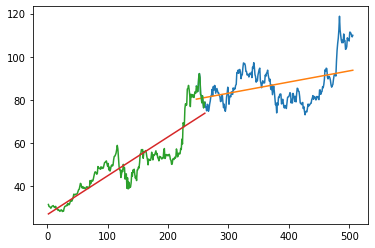

In [6]:
# plot data with a trendline - most recent 260 days

x = dataframes['data0']['Index']
y = dataframes['data0']['Close']

plt.plot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

# plot data with a trendline - the oldest 260 days

x = dataframes['data49']['Index']
y = dataframes['data49']['Close']

plt.plot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.show()

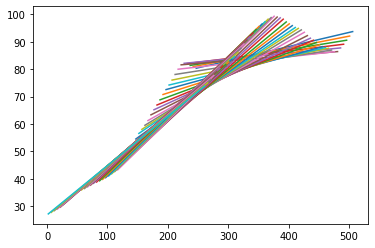

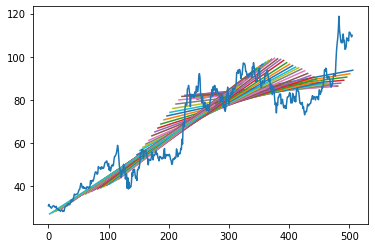

In [7]:
# plot only trendlines, weekly, each line representing 1 year of data
# if the movement is too stable, these graphs won't be useable

for i in range(len(dataframes)):
    x = dataframes['data' + str(i)]['Index']
    y = dataframes['data' + str(i)]['Close']

    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

plt.show()

for i in range(len(dataframes)):
    x = dataframes['data' + str(i)]['Index']
    y = dataframes['data' + str(i)]['Close']

    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

plt.plot(range(len(df)), df['Close'])
plt.show()

In [8]:
# create pred and pred/close list for each of the 50 dataframes

k = len(dataframes)

for e in range(k):
    nlist = []
    ylist = []

    y = dataframes['data' + str(e)]['Close']
    
    for i in range(1,len(dataframes['data0'])+1): # create pred
        x = range(260)
        m, b = np.polyfit(x, y, 1)
        d = m*i+b
        nlist.append(d)
        
    dataframes['data' + str(e)]['pred'] = nlist
    
    for i in range(1,len(dataframes['data0'])+1): # create pred/close
        d = (dataframes['data' + str(e)]['pred'].iloc[i-1])/(dataframes['data' + str(e)]['Close'].iloc[i-1])
        ylist.append(d)

    dataframes['data' + str(e)]['pred/close'] = ylist

print(dataframes['data49'])
print(dataframes['data0'])

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                Close  Index       pred  pred/close
Date                                               
2019-09-05  31.500000      2  27.312147    0.867052
2019-09-06  30.559999      3  27.492363    0.899619
2019-09-09  30.500000      4  27.672579    0.907298
2019-09-10  30.230000      5  27.852794    0.921363
2019-09-11  29.760000      6  28.033010    0.941969
...               ...    ...        ...         ...
2020-09-09  81.910004    257  73.267114    0.894483
2020-09-10  78.980003    258  73.447329    0.929948
2020-09-11  76.339996    259  73.627545    0.964469
2020-09-14  77.900002    260  73.807760    0.947468
2020-09-15  78.930000    261  73.987976    0.937387

[260 rows x 4 columns]
                 Close  Index       pred  pred/close
Date                                                
2020-08-25   86.349998    247  80.397648    0.931067
2020-08-26   86.019997    248  80.449330    0.935240
2020-08-27   83.800003    249  80.501011    0.960633
2020-08-28   85.550003    250  80.5

In [9]:
# pull the last 'Close' and pred/close' from each dataframe in dataframes and make a new dataframe out of it
# each row is the last close price in a 1 year period and the final pred/close derived from a 1 year trendline
# the rows have a 51 week overlap and are separated by 1 week

nlist = []
ylist = []
k = len(dataframes['data0'])

for e in reversed(range(len(dataframes))):
    nlist.append(round(dataframes['data' + str(e)]['pred/close'].iloc[k-1],4))
    ylist.append(round(dataframes['data' + str(e)]['Close'].iloc[k-1],4))
    
df = pd.DataFrame(list(zip(ylist, nlist)), columns=['Close', 'pred/close'])
print(df.head())
print('')
print(df.tail())

   Close  pred/close
0  78.93      0.9374
1  77.70      0.9677
2  81.77      0.9342
3  84.48      0.9222
4  85.28      0.9306

     Close  pred/close
45  110.11      0.7973
46  110.55      0.8063
47  104.65      0.8659
48  111.40      0.8271
49  109.92      0.8532


In [10]:
# determine the weeks where pred/close is >1 and therefore they are better weeks to buy in
# steady stocks could be at about 50/50 but stocks exponentially rising could have close to 0 pred/close > 1

nlist = []
for i in range(len(df)):
    if df['pred/close'].iloc[i] >= 1:
        nlist.append(1)
    else:
        nlist.append(0)

df['>1'] = nlist

print('total weeks:', len(df['>1']))
print('number above 1:', sum(df['>1']))
print('')
print(df)


total weeks: 50
number above 1: 29

     Close  pred/close  >1
0    78.93      0.9374   0
1    77.70      0.9677   0
2    81.77      0.9342   0
3    84.48      0.9222   0
4    85.28      0.9306   0
5    81.56      0.9869   0
6    78.88      1.0317   1
7    76.58      1.0693   1
8    77.99      1.0619   1
9    83.36      1.0046   1
10   85.07      0.9967   0
11   93.74      0.9207   0
12   89.83      0.9780   0
13   96.85      0.9232   0
14   91.55      0.9923   0
15   91.71      1.0039   1
16   94.58      0.9878   0
17   88.21      1.0737   1
18   94.13      1.0182   1
19   87.66      1.1035   1
20   91.47      1.0667   1
21   91.46      1.0768   1
22   84.74      1.1691   1
23   84.13      1.1833   1
24   78.53      1.2639   1
25   82.75      1.1958   1
26   78.38      1.2562   1
27   76.00      1.2820   1
28   82.20      1.1767   1
29   78.55      1.2230   1
30   81.61      1.1687   1
31   84.02      1.1312   1
32   77.83      1.2141   1
33   74.64      1.2541   1
34   76.23      1.2

In [11]:
# create multiple investment strategies and simulate the returns over 1 year
# the strategy that ends up with the most stock for the same amount of money is ultimately the best

print('baseline - contribute 10 every week')
print('opt1 - buy in every week proportional to the pred/close variable')
print('opt2 - buy in every week proportional to the pred/close variable - squared')
print('opt3 - contribute 20 only on the weeks where pred/close is >=1')
print('opt4 - buy in every week inversely proportional to the pred/close variable - as a fact check (should be lower)')


invest = 500 # max amount to contribute
wkly_contrib = 10 # how much to contribute each week

df['pred/close2'] = round(df['pred/close']**2,4) # make the value differences a little more pronounced

# baseline - buy in $10 weekly no matter what - baseline
df['baseline'] = 0
df['baseline_stk'] = 0
v = invest
for i in range(len(df)):
    df['baseline'].iloc[i] = wkly_contrib
    df['baseline_stk'].iloc[i] = round(df['baseline'].iloc[i]/df['Close'].iloc[i],4)
    v -= wkly_contrib
    if v < wkly_contrib:
        break
baseline_left = v
        
# opt1 - buy in every week but proportionally to the pred/close
df['opt1'] = 0
df['opt1_stk'] = 0
v = invest
for i in range(len(df)):
    df['opt1'].iloc[i] = wkly_contrib*df['pred/close'].iloc[i]
    df['opt1_stk'].iloc[i] = round(df['opt1'].iloc[i]/df['Close'].iloc[i],4)
    v -= wkly_contrib*df['pred/close'].iloc[i]
    if i == (len(df)-1):
        t = i
    else:
        t = i+1
    if v < wkly_contrib*df['pred/close'].iloc[t]:
        break
opt1_left = v

# opt2 - buy in every week but proportionally to the pred/close and pred/close is squared to be more dramatic
df['opt2'] = 0
df['opt2_stk'] = 0
v = invest
for i in range(len(df)):
    df['opt2'].iloc[i] = wkly_contrib*df['pred/close2'].iloc[i]
    df['opt2_stk'].iloc[i] = round(df['opt2'].iloc[i]/df['Close'].iloc[i],4)
    v -= wkly_contrib*df['pred/close2'].iloc[i]
    if i == (len(df)-1):
        t = i
    else:
        t = i+1
    if v < wkly_contrib*df['pred/close2'].iloc[t]:
        break
opt2_left = v

# opt3 - buy in every week but proportionally to the pred/close & buy 0 on days <1
df['opt3'] = 0
df['opt3_stk'] = 0
v = invest
for i in range(len(df)):
    df['opt3'].iloc[i] = wkly_contrib*2*df['>1'].iloc[i] 
    df['opt3_stk'].iloc[i] = round(df['opt3'].iloc[i]/df['Close'].iloc[i],4)
    v -= wkly_contrib*2*df['>1'].iloc[i]
    if i == (len(df)-1):
        t = i
    else:
        t = i+1
    if v < wkly_contrib*2*df['>1'].iloc[t]:
        break
opt3_left = v

# opt4 - buy in every week but proportionally to the inverse of pred/close - to verify my method
df['opt4'] = 0
df['opt4_stk'] = 0
v = invest
for i in range(len(df)):
    df['opt4'].iloc[i] = round(wkly_contrib/df['pred/close'].iloc[i],4)
    df['opt4_stk'].iloc[i] = round(df['opt4'].iloc[i]/df['Close'].iloc[i],4)
    v -= wkly_contrib*df['pred/close'].iloc[i] # technically wrong, should be a divide, but divide doesn't work???
    if i == (len(df)-1):
        t = i
    else:
        t = i+1
    if v < wkly_contrib/df['pred/close'].iloc[t]:
        break
opt4_left = v


d = {'name': ['baseline', 'op1', 'op2', 'op3', 'op4']
     ,'bought_in': [sum(df['baseline']), sum(df['opt1']), sum(df['opt2']), sum(df['opt3']),sum(df['opt4'])]
     ,'leftover': [baseline_left, opt1_left, opt2_left, opt3_left, opt4_left]
     ,'stocks_held': [round(sum(df['baseline_stk']),4), round(sum(df['opt1_stk']),4), round(sum(df['opt2_stk']),4), 
                     round(sum(df['opt3_stk']),4), round(sum(df['opt4_stk']),4)]
     ,'cost_per_stock': [sum(df['baseline'])/sum(df['baseline_stk']), sum(df['opt1'])/sum(df['opt1_stk']), 
                        sum(df['opt2'])/sum(df['opt2_stk']), sum(df['opt3'])/sum(df['opt3_stk']), 
                        sum(df['opt4'])/sum(df['opt4_stk'])]
     ,'profit': [(sum(df['baseline_stk']) * df['Close'].iloc[49]) - sum(df['baseline']), 
                (sum(df['opt1_stk']) * df['Close'].iloc[49]) - sum(df['opt1']), 
                (sum(df['opt2_stk']) * df['Close'].iloc[49]) - sum(df['opt2']), 
                (sum(df['opt3_stk']) * df['Close'].iloc[49]) - sum(df['opt3']), 
                (sum(df['opt4_stk']) * df['Close'].iloc[49]) - sum(df['opt4'])]
    }

df2 = pd.DataFrame(data=d)

df2['diff'] = 0
df2['diff'].iloc[1] = df2['profit'].iloc[1]-df2['profit'].iloc[0]
df2['diff'].iloc[2] = df2['profit'].iloc[2]-df2['profit'].iloc[0]
df2['diff'].iloc[3] = df2['profit'].iloc[3]-df2['profit'].iloc[0]
df2['diff'].iloc[4] = df2['profit'].iloc[4]-df2['profit'].iloc[0]

df2['%_diff'] = (df2['diff']/df2['profit'])*100
df2

baseline - contribute 10 every week
opt1 - buy in every week proportional to the pred/close variable
opt2 - buy in every week proportional to the pred/close variable - squared
opt3 - contribute 20 only on the weeks where pred/close is >=1
opt4 - buy in every week inversely proportional to the pred/close variable - as a fact check (should be lower)


C:\Users\james\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,name,bought_in,leftover,stocks_held,cost_per_stock,profit,diff,%_diff
0,baseline,500.0000,0.000,5.7883,86.381148,136.249936,0.000000,0.000000
1,op1,494.6880,5.312,5.8458,84.622806,147.882336,11.632400,7.865983
2,op2,499.5620,0.438,6.0074,83.157772,160.771408,24.521472,15.252384
3,op3,500.0000,0.000,6.0952,82.031763,169.984384,33.734448,19.845616
4,op4,452.8888,5.312,5.2679,85.971412,126.158768,-10.091168,-7.998785


#### Final notes:

Stocks going up parabolically will almost never be above 1, so I can't simply not buy in when pred/close is not above 1. GOOG is like this as of 9/3/2021. opt3 can't be used. This kind of stock will also produce worse than baseline profits because opt1 and opt2 won't be investing the full 500 over the course of the year.

Stocks in a big S-curve, flat ~ spike ~ flat, will only have a pred/close above 1 on the latter half of the year, so again, I can't contribute nothing. TSM and TSLA are like this as of 9/3/2021.


##### Results as compared to the baseline (on 9/3/2021):

aapl - opt1: +3.39, opt2: +7.28 <br>
amd - opt1: +11.63, opt2: +24.52 <br>
amzn - opt1: +1.14, opt2: +3.85 <br>
crm - opt1: +5.99, opt2: +11.65 <br>
goog - opt1: -8.16, opt2: -16.01<br>
intc - opt1: +3.74, opt2: +7.26 <br>
mdb - opt1: +17.92, opt2: +37.92 *huge spike on 9/3/2021, exclude due to misleadingly high<br>
msft - opt1: +2.83, opt2: +5.81 <br>
nvda - opt1: +12.44, opt2: +28.15 <br>
qqq - opt1: +0.30, opt2: +0.68 <br>
sbux - opt1: -5.73, opt2: -10.70<br>
sq - opt1: -3.00, opt2: -3.23<br>
tsla - opt1: +0.15, opt2: +3.38 <br>
tsm - opt1: -4.02, opt2: -7.44<br>

Excluding MDB (due to misleadingly high extra profits), opt1 nets +20.7, opt2 nets +55.2. investing 500 into 13 stocks over 1 year (6500 total investment), with 55.2 extra profit over baseline. 0.85% better than baseline.

In [12]:
df

,Close,pred/close,>1,pred/close2,baseline,baseline_stk,opt1,opt1_stk,opt2,opt2_stk,opt3,opt3_stk,opt4,opt4_stk
0,78.93,0.9374,0,0.8787,10,0.1267,9.374,0.1188,8.787,0.1113,0,0.0000,10.6678,0.1352
1,77.70,0.9677,0,0.9364,10,0.1287,9.677,0.1245,9.364,0.1205,0,0.0000,10.3338,0.1330
2,81.77,0.9342,0,0.8727,10,0.1223,9.342,0.1142,8.727,0.1067,0,0.0000,10.7043,0.1309
3,84.48,0.9222,0,0.8505,10,0.1184,9.222,0.1092,8.505,0.1007,0,0.0000,10.8436,0.1284
4,85.28,0.9306,0,0.8660,10,0.1173,9.306,0.1091,8.660,0.1015,0,0.0000,10.7458,0.1260
5,81.56,0.9869,0,0.9740,10,0.1226,9.869,0.1210,9.740,0.1194,0,0.0000,10.1327,0.1242
6,78.88,1.0317,1,1.0644,10,0.1268,10.317,0.1308,10.644,0.1349,20,0.2535,9.6927,0.1229
7,76.58,1.0693,1,1.1434,10,0.1306,10.693,0.1396,11.434,0.1493,20,0.2612,9.3519,0.1221
8,77.99,1.0619,1,1.1276,10,0.1282,10.619,0.1362,11.276,0.1446,20,0.2564,9.4171,0.1207
9,83.36,1.0046,1,1.0092,10,0.1200,10.046,0.1205,10.092,0.1211,20,0.2399,9.9542,0.1194
